In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 10
avgD = M/2
T = 100
x0 = 5
b = 0.95

c = lambda x: 0.1*x # cost of reorder
f = lambda x: x # revenue from sales
g = lambda x: 0.5*x # firesale at end of year
h = lambda x: 0.05*x # cost of maintaining inventory
r = lambda x, a, xp: np.round(f(x+a-xp) - c(a) - h(x+a), 2) # reward function / revenue in month function
xp = lambda x, a, D: max(x+a-D, 0) # state transition equation, given demand

def discountedSum(R, d):
    sum = 0
    for i, r in enumerate(R):
        sum += R[i] * (d ** i)
    return sum


In [173]:
# One Period Run Through
D = np.random.poisson(avgD)
x = 10
a = 4
print(x, a, D, xp(x, a, D), r(x,a, xp(x, a, D)))

10 4 6 8 4.9


In [188]:
# Test Arbitary Policy
def policyEvaluation(pol, x0, T=500):
    R = []
    I = [x0]
    D = []
    for i in range(T):
        x = I[i] # state is observed
        a = pol(x) # action taken based on policy rule
        d = np.random.poisson(avgD) # demand is randomly generated
        D.append(d)
        I.append(xp(x, a, d)) # Inventory is changed
        R.append(r(x,a, xp(x, a, d))) # Reward is obtained
    R.append(g(I[-1]))
    V = discountedSum(R, b)
    return V


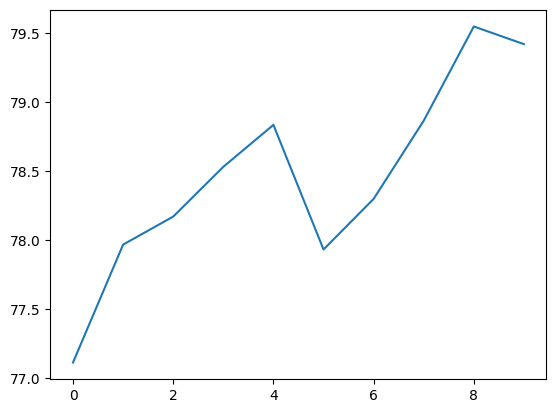

In [191]:
# Value function for arbitrary policy
pol = lambda x: min(np.round(x)+5, M-x) 
V = []
for x in range(M):
    V.append(np.mean([policyEvaluation(pol, x0=x) for i in range(100)]))
plt.plot(range(M), V)

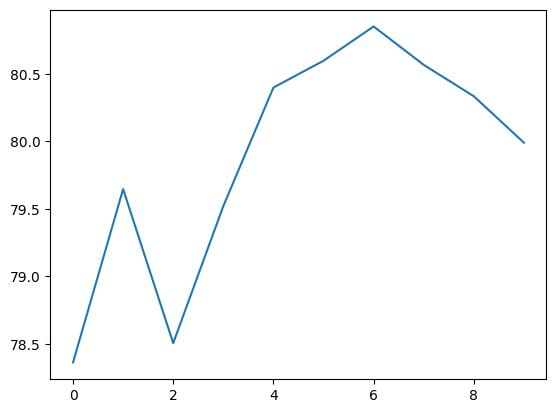

In [192]:
# Value function for arbitrary policy
pol = lambda x: min(np.round(x)+10, M-x) 
V = []
for x in range(M):
    V.append(np.mean([policyEvaluation(pol, x0=x) for i in range(100)]))
plt.plot(range(M), V)